### Imports

In [21]:
import json
import pandas as pd

### Load json to dataframe

In [22]:
#json files
comet_json = "parsed_results_comet_concepts.json"
transformer_json = "parsed_results_transformer_concepts.json"

In [23]:
with open(comet_json, 'r') as f:
    parsed_results = json.load(f)

results_list = []

# convert string to boolean
bool_dict = {'True': True, 'False': False}

for exp_name, result in parsed_results.items():
    if "muris" in exp_name:
        method, c, d, _, k = exp_name.split('_')
    else:
        method, c, d, k = exp_name.split('_')
    c = int(c[1:])
    d = d[1:] # tabula or swissprot
    k = k[1:]
    acc, std = result["test_acc"][:5], result["test_acc"][-5:-1]
    acc, std = float(acc), float(std)

    results_list.append({'model': method, 'dataset': d, 'num_GOs': int(c),
                                    'n_shot': int(k), 'test_acc': acc, 'test_std': std})

In [24]:
df_results_comet = pd.DataFrame(results_list)

In [25]:
with open(transformer_json, 'r') as f:
    parsed_results = json.load(f)

results_list = []

# convert string to boolean
bool_dict = {'True': True, 'False': False}

for exp_name, result in parsed_results.items():
    s1, s2 = exp_name.split('.')

    s1 = s1.split('_')

    dropout = s1[-1][1:]

    if s2[0] != '_':
        dropout = float(dropout + '.' + s2.split('_')[0])

    ffw_dim = int(s1[-2][3:])
    nhead = int(s1[-3][1:])
    num_layers = int(s1[-4][1:])
    num_GOs = int(s1[-5][1:])
    model = '_'.join(s1[:-5])

    s2 = s2.split('_')[1:]
    given_mask = bool_dict[s2[0][1:]]

    if given_mask:
        num_GOs = float('nan')

    n_shot = int(s2[-1][1:])
    dataset = '_'.join(s2[1:-1])[1:]
    
    train_acc = result['train_acc']
    val_acc = result['val_acc']
    test_acc = result['test_acc']

    acc, std = result["test_acc"][:5], result["test_acc"][-5:-1]
    acc, std = float(acc), float(std)
    #print("hhee", train_acc)

    results_list.append({'model': model, 'dataset': dataset, 'num_GOs': num_GOs, 'num_layers': num_layers,
                                    'n_shot': int(n_shot), 'test_acc': acc, 'test_std': std})

In [26]:
df_results_transformer = pd.DataFrame(results_list)

In [27]:
df_results_comet = df_results_comet.sort_values(by='num_GOs', ascending=True)
df_results_transformer = df_results_transformer.sort_values(by='num_GOs', ascending=True)

In [28]:
df_results_comet

,model,dataset,num_GOs,n_shot,test_acc,test_std
19,comet,tabula,1,5,88.72,0.65
4,comet,swissprot,1,1,53.48,0.96
5,comet,swissprot,1,5,60.59,0.62
18,comet,tabula,1,1,82.16,0.93
25,comet,tabula,5,5,92.07,0.53
24,comet,tabula,5,1,84.08,0.86
11,comet,swissprot,5,5,64.85,0.61
10,comet,swissprot,5,1,55.30,0.96
15,comet,tabula,10,5,92.76,0.51
14,comet,tabula,10,1,84.61,0.86


## For Comet

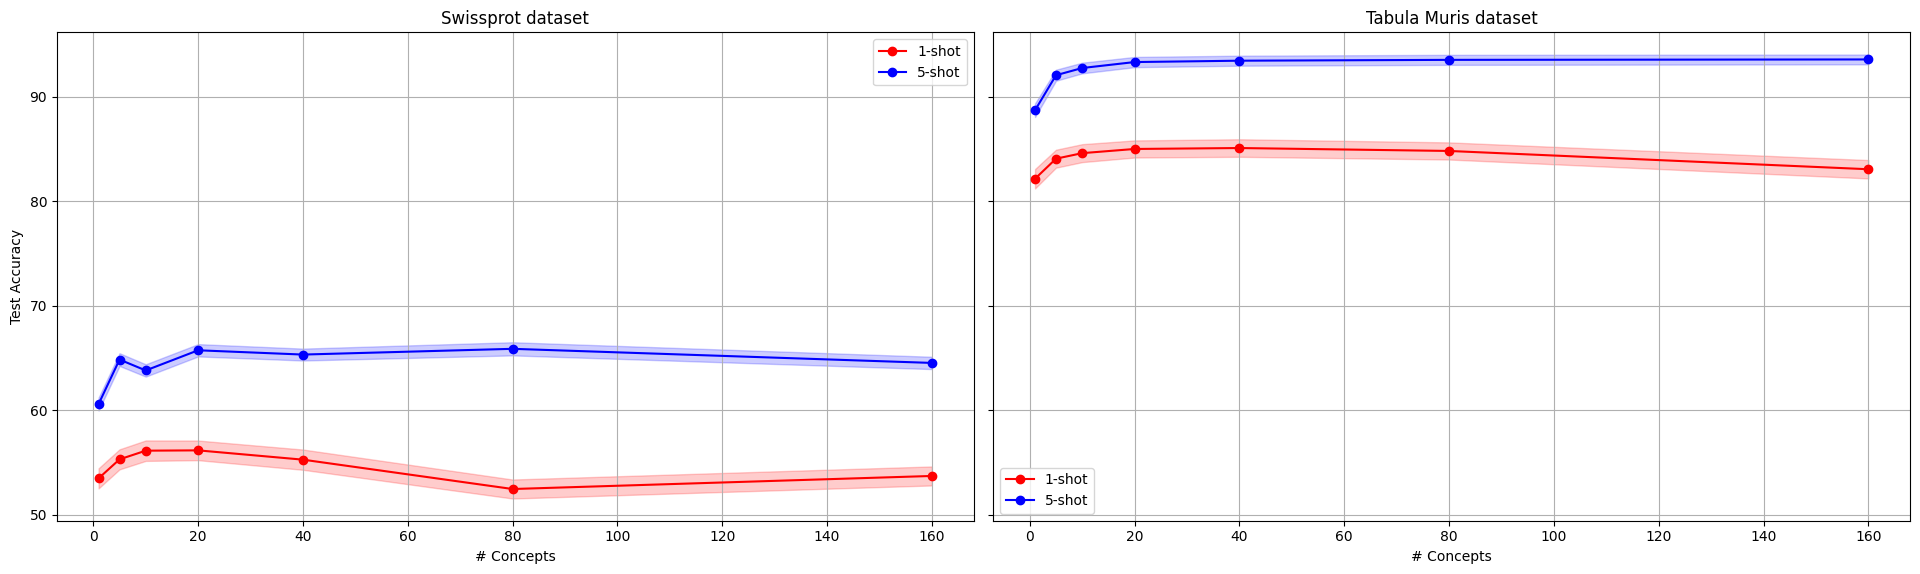

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Separate the datasets
tabula_df = df_results_comet[df_results_comet['dataset'] == 'tabula']
swissprot_df = df_results_comet[df_results_comet['dataset'] == 'swissprot']


# Function to extract data for plotting
def get_plot_data(dataset_df, n_shot_value):
    filtered_df = dataset_df[dataset_df['n_shot'] == n_shot_value]
    return filtered_df['num_GOs'].values, filtered_df['test_acc'].values, filtered_df['test_std'].values

# Get data for plots
tabula_concepts, tabula_1_shot, tabula_1_shot_std = get_plot_data(tabula_df, 1)
_, tabula_5_shot, tabula_5_shot_std = get_plot_data(tabula_df, 5)

swissprot_concepts, swissprot_1_shot, swissprot_1_shot_std = get_plot_data(swissprot_df, 1)
_, swissprot_5_shot, swissprot_5_shot_std = get_plot_data(swissprot_df, 5)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(19.3, 5.84), sharey=True)
#for axis in axs:
#    axis.set_ylim([50,100])
# Plot for Swissprot dataset
axs[0].plot(swissprot_concepts, swissprot_1_shot, '-o', color='red', label='1-shot')
axs[0].fill_between(swissprot_concepts, swissprot_1_shot - swissprot_1_shot_std, swissprot_1_shot + swissprot_1_shot_std, color='red', alpha=0.2)
axs[0].plot(swissprot_concepts, swissprot_5_shot, '-o', color='blue', label='5-shot')
axs[0].fill_between(swissprot_concepts, swissprot_5_shot - swissprot_5_shot_std, swissprot_5_shot + swissprot_5_shot_std, color='blue', alpha=0.2)
axs[0].set_title('Swissprot dataset')
axs[0].set_xlabel('# Concepts')
axs[0].set_ylabel('Test Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot for Tabula Muris dataset
#axs[1].set_xscale('log')
axs[1].plot(tabula_concepts, tabula_1_shot, '-o', color='red', label='1-shot')
axs[1].fill_between(tabula_concepts, tabula_1_shot - tabula_1_shot_std, tabula_1_shot + tabula_1_shot_std, color='red', alpha=0.2)
axs[1].plot(tabula_concepts, tabula_5_shot, '-o', color='blue', label='5-shot')
axs[1].fill_between(tabula_concepts, tabula_5_shot - tabula_5_shot_std, tabula_5_shot + tabula_5_shot_std, color='blue', alpha=0.2)
axs[1].set_title('Tabula Muris dataset')
axs[1].set_xlabel('# Concepts')
axs[1].legend()
axs[1].grid(True)

#plt.savefig()
# Adjust the layout
plt.tight_layout()


## ## For the transformer

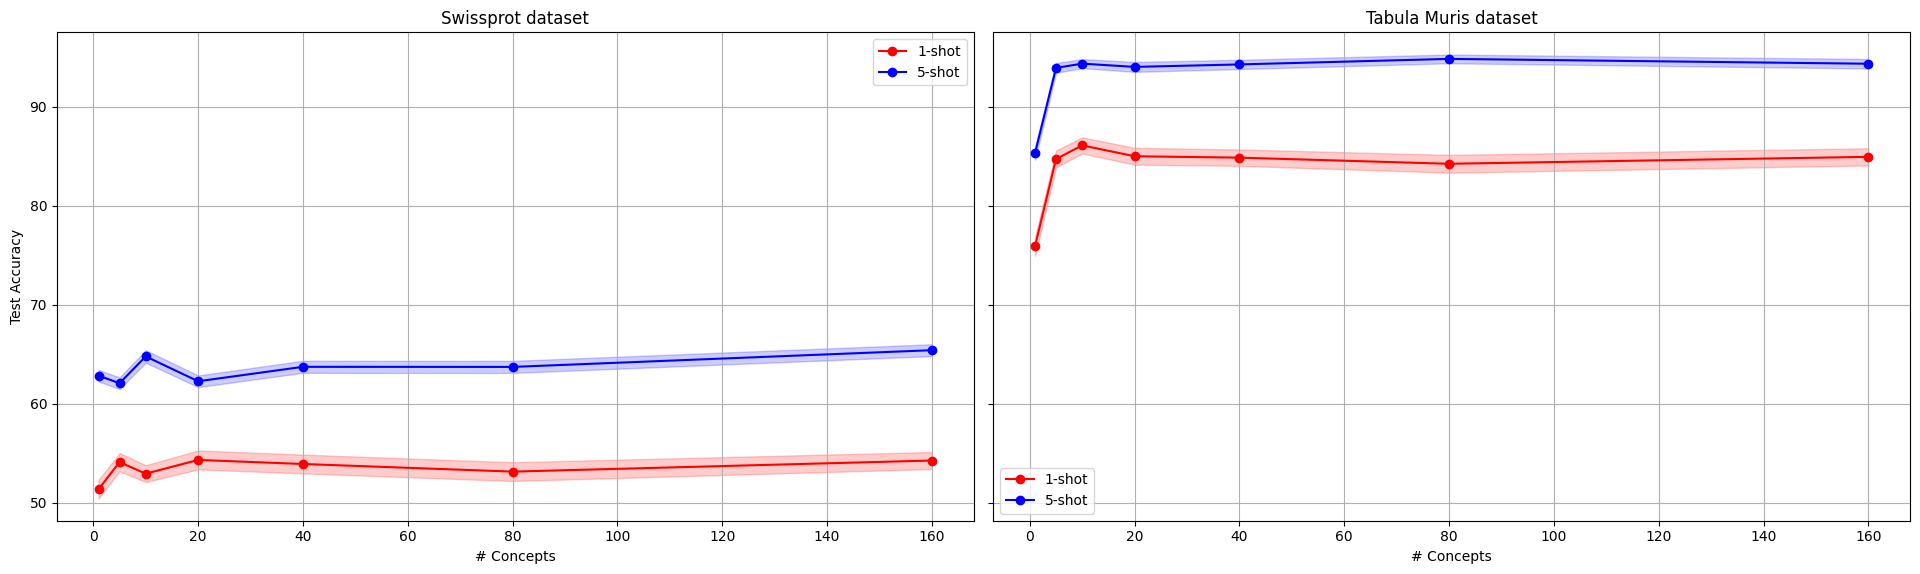

In [30]:
# Separate the datasets
tabula_df = df_results_transformer[df_results_transformer['dataset'] == 'tabula_muris']
swissprot_df = df_results_transformer[df_results_transformer['dataset'] == 'swissprot']


# Function to extract data for plotting
def get_plot_data(dataset_df, n_shot_value):
    filtered_df = dataset_df[dataset_df['n_shot'] == n_shot_value]
    return filtered_df['num_GOs'].values, filtered_df['test_acc'].values, filtered_df['test_std'].values

# Get data for plots
tabula_concepts, tabula_1_shot, tabula_1_shot_std = get_plot_data(tabula_df, 1)
_, tabula_5_shot, tabula_5_shot_std = get_plot_data(tabula_df, 5)

swissprot_concepts, swissprot_1_shot, swissprot_1_shot_std = get_plot_data(swissprot_df, 1)
_, swissprot_5_shot, swissprot_5_shot_std = get_plot_data(swissprot_df, 5)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(19.3, 5.84), sharey=True)
#for axis in axs:
#    axis.set_ylim([50,100])
# Plot for Swissprot dataset
axs[0].plot(swissprot_concepts, swissprot_1_shot, '-o', color='red', label='1-shot')
axs[0].fill_between(swissprot_concepts, swissprot_1_shot - swissprot_1_shot_std, swissprot_1_shot + swissprot_1_shot_std, color='red', alpha=0.2)
axs[0].plot(swissprot_concepts, swissprot_5_shot, '-o', color='blue', label='5-shot')
axs[0].fill_between(swissprot_concepts, swissprot_5_shot - swissprot_5_shot_std, swissprot_5_shot + swissprot_5_shot_std, color='blue', alpha=0.2)
axs[0].set_title('Swissprot dataset')
axs[0].set_xlabel('# Concepts')
axs[0].set_ylabel('Test Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot for Tabula Muris dataset
#axs[1].set_xscale('log')
axs[1].plot(tabula_concepts, tabula_1_shot, '-o', color='red', label='1-shot')
axs[1].fill_between(tabula_concepts, tabula_1_shot - tabula_1_shot_std, tabula_1_shot + tabula_1_shot_std, color='red', alpha=0.2)
axs[1].plot(tabula_concepts, tabula_5_shot, '-o', color='blue', label='5-shot')
axs[1].fill_between(tabula_concepts, tabula_5_shot - tabula_5_shot_std, tabula_5_shot + tabula_5_shot_std, color='blue', alpha=0.2)
axs[1].set_title('Tabula Muris dataset')
axs[1].set_xlabel('# Concepts')
axs[1].legend()
axs[1].grid(True)

#plt.savefig()
# Adjust the layout
plt.tight_layout()
